# Phrase annotation and phrase extraction 
- read ST tables
- read ST annotations: annotation must be consistent with ST tables, i.e. have same ids for texts, segments and words 
- compute Phrases and HPhra values from TGroup feature
- some regression graphs

In [70]:
# import phraseTables library
import sys
sys.path.insert(0, '/users/kent/dsahoo/')

import phraseTables
import importlib
importlib.reload(phraseTables)

<module 'phraseTables' from '/users/kent/dsahoo/phraseTables.py'>

In [3]:
import pandas as pd

# read all tables of BML12 study into STdf
STdf = phraseTables.readTPRDBtables(["ST19/Tables/"], "*st")

# read Annotation file into Anno
Anno = pd.read_csv("/data/critt/shared/bc2/Annotation/ML1_TPRDB.st", sep="\t", dtype=None)

print(f"STdf {STdf.shape} Annotation {Anno.shape}")

STdf (8918, 66) Annotation (160, 10)


In [25]:
STdf.head()

,Id,STseg,Study,Session,SL,TL,Task,Text,Part,SToken,...,TrtT,InEff,Yawat,Edit,AltT,CountT,ProbT,HTra,HSeg,HCross
0,1,1,ST19,P28_C2,en,en,C,2,P28,Freedom,...,1649,0.88,---,Freedom,2,9,0.5625,0.9887,0.0000,0.0000
1,2,1,ST19,P28_C2,en,en,C,2,P28,",",...,0,0.50,---,",",2,14,0.8750,0.5436,0.5436,0.5436
2,3,1,ST19,P28_C2,en,en,C,2,P28,democracy,...,0,1.00,---,_democracy,4,9,0.5625,1.5919,0.3373,1.1863
3,4,1,ST19,P28_C2,en,en,C,2,P28,rule,...,0,1.00,---,_rule,8,9,0.5625,2.2169,0.3373,0.8960
4,5,1,ST19,P28_C2,en,en,C,2,P28,of,...,0,1.00,---,_of,7,9,0.5625,2.0919,0.3373,0.8960


In [28]:
# 56 Sessions
# 16 Parts
# 4 Texts
# 4 Tasks
STdf['Task'].unique().tolist()

['C', 'LV', 'S', 'T']

In [34]:
Anno

,Id,STseg,Study,Session,SL,TL,Task,Text,Part,Annotation,TextId
0,1,1,SG12,P01_T1,en,de,T,1,P01,lexical_chain1,1_1
1,2,1,SG12,P01_T1,en,de,T,1,P01,lexical_chain1,1_2
2,3,1,SG12,P01_T1,en,de,T,1,P01,---,1_3
3,4,1,SG12,P01_T1,en,de,T,1,P01,---,1_4
4,5,1,SG12,P01_T1,en,de,T,1,P01,---,1_5
5,6,1,SG12,P01_T1,en,de,T,1,P01,---,1_6
6,7,2,SG12,P01_T1,en,de,T,1,P01,lexical_chain1,1_7
7,8,2,SG12,P01_T1,en,de,T,1,P01,lexical_chain1,1_8
8,9,2,SG12,P01_T1,en,de,T,1,P01,lexical_chain1,1_9
9,10,2,SG12,P01_T1,en,de,T,1,P01,lexical_chain1,1_10


In [16]:
Anno['STseg'].unique().tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [17]:
phraseTables.parsePhraseTag(Anno)

{'lexical_chain': {'1_1_lexical_chain1': {'txtId': ['1_1', '1_2']},
  '1_2_lexical_chain1': {'txtId': ['1_7', '1_8', '1_9', '1_10']}}}

In [15]:
Anno[(Anno.Annotation != '---')]

,Id,STseg,Study,Session,SL,TL,Task,Text,Part,Annotation
0,1,1,SG12,P01_T1,en,de,T,1,P01,lexical_chain1
1,2,1,SG12,P01_T1,en,de,T,1,P01,lexical_chain1
6,7,2,SG12,P01_T1,en,de,T,1,P01,lexical_chain1
7,8,2,SG12,P01_T1,en,de,T,1,P01,lexical_chain1
8,9,2,SG12,P01_T1,en,de,T,1,P01,lexical_chain1
9,10,2,SG12,P01_T1,en,de,T,1,P01,lexical_chain1


# Extract phrases from the STdf 

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
# extract phrase tables 
PhrTables = phraseTables.phraseTables(STdf, Anno)
PhrTables.head(100)

,AHTra,Annotation,Del,Dur,FFDur,Id,Ins,Part,SGroup,SL,STlen,STnbr,STseg,Session,Study,TGroup,TL,TTid,TTlen,TTnbr,Task,Text,TrtS,TrtT,TextId,HPhra
0,1.26725,lexical_chain,0,1109,276,1,8,P32,This_is,en,7,2,1,P32_T1,ST19,Dies_ist,de,1+2,8,2,T,1,4532,4000,1_1,1.554585
1,1.25740,lexical_chain,9,13203,268,2,41,P32,Japan_since_becoming_Australia,en,30,4,1,P32_T1,ST19,Japan_seit_ich_zum_ernannt_wurde,de,7+8+9+13+15+16,32,6,T,1,6491,6583,1_2,2.221252
2,1.26725,lexical_chain,0,1203,231,1,7,P37,This_is,en,7,2,1,P37_C1,ST19,This_is,en,1+2,7,2,C,1,4532,6209,1_1,1.554585
3,1.25740,lexical_chain,2,10937,0,2,32,P37,Japan_since_becoming_Australia,en,30,4,1,P37_C1,ST19,Australia_Japan_since_becoming,en,7+8+9+10,30,4,C,1,1919,2925,1_2,2.221252
4,1.26725,lexical_chain,0,1109,239,1,7,P52,This_is,en,7,2,1,P52_T1,ST19,Das_ist,de,1+2,7,2,T,1,11935,2011,1_1,1.554585
5,1.25740,lexical_chain,5,9578,184,2,34,P52,Japan_since_becoming_Australia,en,30,4,1,P52_T1,ST19,Australiens_Japan_seitdem_ich_geworden_bin,de,7+9+10+11+15+16,42,6,T,1,4720,13401,1_2,2.221252
6,1.26725,lexical_chain,0,1125,388,1,7,P53,This_is,en,7,2,1,P53_C1,ST19,This_is,en,1+2,7,2,C,1,3679,2600,1_1,1.554585
7,1.25740,lexical_chain,1,13296,144,2,31,P53,Japan_since_becoming_Australia,en,30,4,1,P53_C1,ST19,Australia_Japan_since_becoming,en,7+8+9+10,30,4,C,1,2116,2479,1_2,2.221252
8,1.26725,lexical_chain,3,7749,224,1,11,P30,This_is,en,7,2,1,P30_S1,ST19,Das_ist,de,1+2,7,2,S,1,1120,5458,1_1,1.554585
9,1.25740,lexical_chain,0,3020,0,2,39,P30,Japan_since_becoming_Australia,en,30,4,1,P30_S1,ST19,Australien_Japan_seit_ich_geworden_bin,de,8+9+10+15+16+17,38,6,S,1,2080,0,1_2,2.221252


In [ ]:
# plot a regression 

import statsmodels.formula.api as smf
import statsmodels.api as sma
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lmf = smf.ols(formula="Dur ~ STlen PHTra + Task + Annotation", data=PhrTables).fit()
print(lmf.summary())

sns.lmplot(y="Dur", x="STlen", hue="Annotation", col="Task", x_estimator=np.mean, data=PhrTables);
plt.show()


# Merge Annotations into  STdf 
- add a TextId to the STdf and Anno files
- select columns to be added to the STdf file
- merge columns into STdf file
- some regression plots

In [35]:
# create TextId if not already in the dataframe
if ('TextId' not in STdf.columns) :
    STdf["TextId"] = [str(STdf["Text"][i]) + "_" + str(STdf["Id"][i]) for i in STdf.index]

if ('TextId' not in Anno.columns) :
    Anno["TextId"] = [str(Anno["Text"][i]) + "_" + str(Anno["Id"][i]) for i in Anno.index]

# select the subset to be merged
Manno = Anno[["TextId", "Annotation"]]

# merge the annotations into STdf
STdfMerged = STdf.merge(Manno, on="TextId")
print(f"STdf:{STdf.shape} Manno:{Manno.shape} Merged:{STdfMerged.shape}")
STdfMerged.head()

STdf:(8918, 67) Manno:(160, 2) Merged:(1920, 68)


,Id,STseg,Study,Session,SL,TL,Task,Text,Part,SToken,Lemma,STime,Sdur,Prob1,Prob2,PoS,TGroup,TTid,SGroup,SAGnbr,TAGnbr,Munit,Edit1,Time1,Dur1,Pause1,FixS1,ParalS1,FixT1,ParalT1,Edit2,Time2,Dur2,Pause2,FixS2,ParalS2,FixT2,ParalT2,EditR,Runit,TimeR,DurR,Ins,Del,Dur,Cross,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,InEff,Yawat,Edit,AltT,CountT,ProbT,HTra,HSeg,HCross,TextId,Annotation
0,1,1,ST19,P28_T1,en,de,T,1,P28,This,---,0,0,0,0,---,Dies,1,This,1,1,1,Dies,3750,672,3750,0,0,1,329,---,0,0,0,0,0,0,0,---,0,0,0,4,0,672,1,9265,9265,296,296,0,14,296,3820,20,1568,9791,0.8,---,Dies,3,4,0.3333,1.5546,0.0,0.0,1_1,lexical_chain1
1,1,1,ST19,P29_C1,en,en,C,1,P29,This,---,0,0,0,0,---,This,1,This,1,1,3,Tias_[_sai]his,3078,4218,3078,2,330,1,80,third,7718,672,328,0,0,0,0,---,0,0,0,13,9,5609,1,1561,2139,341,341,0,30,341,5523,5,216,892,4.4,---,Tias_[_sai]histhird[driht],3,5,0.4167,1.5546,0.0,0.0,1_1,lexical_chain1
2,1,1,ST19,P30_S1,en,de,S,1,P30,This,---,0,0,0,0,---,Das,1,This,1,1,1,Das[saD]Das_,4938,7496,4938,8,1750,5,1304,---,0,0,0,0,0,0,0,---,0,0,0,7,3,7496,1,21218,21218,276,276,0,2,276,896,24,1304,5458,2.5,---,Das[saD]Das_,3,3,0.2500,1.5546,0.0,0.0,1_1,lexical_chain1
3,1,1,ST19,P32_T1,en,de,T,1,P32,This,---,0,0,0,0,---,Dies,1,This,1,1,1,Dies,34657,359,34657,2,307,1,17,---,0,0,0,0,0,0,0,---,0,0,0,4,0,359,1,624,126296,276,384,0,10,384,4096,8,676,3012,0.8,---,Dies,3,4,0.3333,1.5546,0.0,0.0,1_1,lexical_chain1
4,1,1,ST19,P33_C1,en,en,C,1,P33,This,---,0,0,0,0,---,This,1,This,1,1,1,hiu[uih]This,5079,3609,5079,0,0,3,1428,---,0,0,0,0,0,0,0,---,0,0,0,7,3,3609,1,734,420906,324,324,0,2,324,540,7,1788,3376,2.0,---,hiu[uih]This,3,5,0.4167,1.5546,0.0,0.0,1_1,lexical_chain1


In [43]:
STdf['Text'].unique().tolist()

[2, 4, 3, 1]

In [41]:
STdfMerged[(STdfMerged.Annotation != '---')]['Text'].unique().tolist()

[1]

                            OLS Regression Results                            
Dep. Variable:                    Dur   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     42.36
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           1.91e-73
Time:                        17:27:37   Log-Likelihood:                -43990.
No. Observations:                4590   AIC:                         8.800e+04
Df Residuals:                    4580   BIC:                         8.807e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

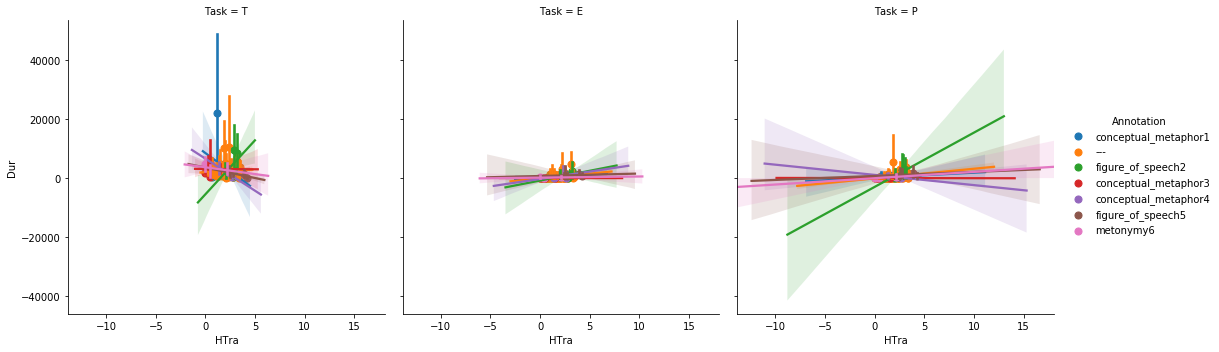

In [200]:
import statsmodels.formula.api as smf
import statsmodels.api as sma
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lmf = smf.ols(formula="Dur ~ HTra +  Annotation + Task ", data=STdfMerged).fit()
print(lmf.summary())

sns.lmplot(y="Dur", x="HTra", hue="Annotation", col="Task", x_estimator=np.mean, data=STdfMerged);
plt.show()


In [44]:
# read Annotation file into Anno
t_Anno = pd.read_csv("/data/critt/shared/bc2/Annotation/P01_T1_TPRDB.tt", sep="\t", dtype=None)

In [46]:
t_Anno[(t_Anno.Annotation != '---')]

,Id,TTseg,Study,Session,SL,TL,Task,Text,Part,Annotation
0,1,1,SG12,P01_T1,en,de,T,1,P01,lexical_chain1
1,2,1,SG12,P01_T1,en,de,T,1,P01,lexical_chain1
2,3,1,SG12,P01_T1,en,de,T,1,P01,lexical_chain1
8,9,2,SG12,P01_T1,en,de,T,1,P01,passive2
9,10,2,SG12,P01_T1,en,de,T,1,P01,passive2
10,11,2,SG12,P01_T1,en,de,T,1,P01,passive2


In [48]:
# read all tables of BML12 study into STdf
TTdf = phraseTables.readTPRDBtables(["ST19/Tables/"], "*tt")

# read Annotation file into Anno
#Anno = pd.read_csv("/data/critt/shared/bc2/Annotation/ML1_TPRDB.st", sep="\t", dtype=None)

print(f"TTdf {TTdf.shape} Annotation {t_Anno.shape}")

TTdf (9444, 57) Annotation (148, 10)


In [60]:
phraseTables.parsePhraseTag(t_Anno,"TT")

{'lexical_chain': {'1_1_lexical_chain1': {'txtId': ['1_1', '1_2', '1_3']}},
 'passive': {'1_2_passive2': {'txtId': ['1_9', '1_10', '1_11']}}}

In [69]:
TTdf[['SGroup','TGroup','STid','TToken']]

,SGroup,TGroup,STid,TToken
0,Freedom,Freedom,1,Freedom
1,",",",",2,","
2,democracy,democracy,3,democracy
3,rule,rule,4,rule
4,of,of,5,of
5,law,law,6,law
6,open,open,7,open
7,markets,markets,8,markets
8,and,and,9,and
9,free,free,10,free


In [75]:
importlib.reload(phraseTables)

<module 'phraseTables' from '/users/kent/dsahoo/phraseTables.py'>

In [76]:
ttPhrTables = phraseTables.phraseTables(TTdf, t_Anno,"TT")

In [77]:
ttPhrTables

,AHTra,Annotation,Del,Dur,FFDur,Id,Ins,Part,SGroup,SL,STid,STlen,STnbr,Session,Study,TGroup,TL,TTlen,TTnbr,TTseg,Task,Text,TrtS,TrtT,TextId,HPhra
0,1.171467,lexical_chain,0,2859,228,1,13,P32,Dies_ist_mein,en,1+2+3,13,3,P32_T1,ST19,Dies_ist_mein,de,13,3,1,T,1,4856,5224,1_1,1.554585
1,1.650000,passive,14,13546,264,2,29,P32,ich_im_letzten,en,9+14,14,3,P32_T1,ST19,im_letzten_ich_zum_ernannt_wurde,de,32,6,1,T,1,2088,3783,1_2,2.450826
2,1.171467,lexical_chain,0,1500,204,1,10,P37,This_is_my,en,1+2+3,10,3,P37_C1,ST19,This_is_my,en,10,3,1,C,1,4532,6901,1_1,1.554585
3,1.919733,passive,2,9312,0,2,23,P37,becoming_Australia__s,en,9+10+11,21,4,P37_C1,ST19,Australia__s_becoming,en,21,4,1,C,1,1869,1609,1_2,2.450826
4,1.171467,lexical_chain,1,4437,576,1,13,P52,Das_ist_mein,en,1+2+3,12,3,P52_T1,ST19,Das_ist_mein,de,12,3,1,T,1,12411,3262,1_1,1.554585
5,1.162867,passive,11,13233,212,2,35,P52,seitdem_ich_Australiens,en,8+9+10+11,23,3,P52_T1,ST19,ich_geworden_bin_Australiens_seitdem,de,36,5,1,T,1,5128,6649,1_2,2.450826
6,1.171467,lexical_chain,8,13313,160,1,18,P53,This_is_my,en,1+2+3,10,3,P53_C1,ST19,This_is_my,en,10,3,1,C,1,3679,6594,1_1,1.554585
7,1.919733,passive,1,11000,0,2,22,P53,becoming_Australia__s,en,9+10+11,21,4,P53_C1,ST19,Australia__s_becoming,en,21,4,1,C,1,1815,2011,1_2,2.450826
8,1.171467,lexical_chain,3,8123,0,1,16,P30,Das_ist_mein,en,1+2+3,12,3,P30_S1,ST19,Das_ist_mein,de,12,3,1,S,1,1935,5458,1_1,1.554585
9,1.182000,passive,0,1210,0,2,13,P30,seit_ich_der,en,8+9+12+13,12,3,P30_S1,ST19,ich_geworden_bin_der_Auslandsminister_seit,de,42,6,1,S,1,4679,0,1_2,2.450826


In [78]:
# create TextId if not already in the dataframe
if ('TextId' not in TTdf.columns) :
    STdf["TextId"] = [str(TTdf["Text"][i]) + "_" + str(TTdf["Id"][i]) for i in TTdf.index]

if ('TextId' not in t_Anno.columns) :
    Anno["TextId"] = [str(t_Anno["Text"][i]) + "_" + str(t_Anno["Id"][i]) for i in t_Anno.index]

# select the subset to be merged
t_Manno = t_Anno[["TextId", "Annotation"]]

# merge the annotations into STdf
TTdfMerged = TTdf.merge(t_Manno, on="TextId")
print(f"STdf:{TTdf.shape} Manno:{t_Manno.shape} Merged:{TTdfMerged.shape}")
TTdfMerged.head()

STdf:(9444, 58) Manno:(148, 2) Merged:(1776, 59)


,Id,TTseg,Study,Session,SL,TL,Task,Text,Part,TToken,Lemma,Prob1,Prob2,PoS,SGroup,STid,TGroup,SAGnbr,TAGnbr,Munit,Edit1,Time1,Dur1,Pause1,FixS1,ParalS1,FixT1,ParalT1,Edit2,Time2,Dur2,Pause2,FixS2,ParalS2,FixT2,ParalT2,Ins,Del,Dur,Cross,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,InEff,Yawat,Edit,HTra,HSeg,HCross,TextId,Annotation
0,1,1,ST19,P28_T1,en,de,T,1,P28,Dies,---,0,0,---,This,1,Dies,1,1,1,Dies,3750,672,3750,0,0,1,329,---,0,0,0,0,0,0,0,4,0,672,1,4093,4093,476,1568,0,14,296,3820,20,1568,9791,0.8,---,Dies,1.5546,0.0,0.0,1_1,lexical_chain1
1,1,1,ST19,P29_C1,en,en,C,1,P29,This,---,0,0,---,This,1,This,1,1,3,Tias_[_sai]his,3078,4218,3078,2,330,1,80,third,7718,672,328,0,0,0,0,13,9,5609,1,827,4311,216,216,0,30,341,5523,5,216,892,4.4,---,Tias_[_sai]histhird[driht],1.5546,0.0,0.0,1_1,lexical_chain1
2,1,1,ST19,P30_S1,en,de,S,1,P30,Das,---,0,0,---,This,1,Das,1,1,1,Das[saD]Das_,4938,7496,4938,8,1750,5,1304,---,0,0,0,0,0,0,0,7,3,7496,1,5249,5249,176,1304,0,2,276,896,24,1304,5458,2.5,---,Das[saD]Das_,1.5546,0.0,0.0,1_1,lexical_chain1
3,1,1,ST19,P32_T1,en,de,T,1,P32,Dies,---,0,0,---,This,1,Dies,1,1,1,Dies,34657,359,34657,2,307,1,17,---,0,0,0,0,0,0,0,4,0,359,1,1031,34999,228,676,0,10,384,4096,8,676,3012,0.8,---,Dies,1.5546,0.0,0.0,1_1,lexical_chain1
4,1,1,ST19,P33_C1,en,en,C,1,P33,This,---,0,0,---,This,1,This,1,1,1,hiu[uih]This,5079,3609,5079,0,0,3,1428,---,0,0,0,0,0,0,0,7,3,3609,1,1093,5203,188,1788,0,2,324,540,7,1788,3376,2.0,---,hiu[uih]This,1.5546,0.0,0.0,1_1,lexical_chain1


In [79]:
TTdfMerged['Annotation'].unique().tolist()

['lexical_chain1', '---', 'passive2']

In [81]:
TTdfMerged[(TTdfMerged.Annotation == 'lexical_chain1')]

,Id,TTseg,Study,Session,SL,TL,Task,Text,Part,TToken,Lemma,Prob1,Prob2,PoS,SGroup,STid,TGroup,SAGnbr,TAGnbr,Munit,Edit1,Time1,Dur1,Pause1,FixS1,ParalS1,FixT1,ParalT1,Edit2,Time2,Dur2,Pause2,FixS2,ParalS2,FixT2,ParalT2,Ins,Del,Dur,Cross,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,InEff,Yawat,Edit,HTra,HSeg,HCross,TextId,Annotation
0,1,1,ST19,P28_T1,en,de,T,1,P28,Dies,---,0,0,---,This,1,Dies,1,1,1,Dies,3750,672,3750,0,0,1,329,---,0,0,0,0,0,0,0,4,0,672,1,4093,4093,476,1568,0,14,296,3820,20,1568,9791,0.80,---,Dies,1.5546,0.0,0.0,1_1,lexical_chain1
1,1,1,ST19,P29_C1,en,en,C,1,P29,This,---,0,0,---,This,1,This,1,1,3,Tias_[_sai]his,3078,4218,3078,2,330,1,80,third,7718,672,328,0,0,0,0,13,9,5609,1,827,4311,216,216,0,30,341,5523,5,216,892,4.40,---,Tias_[_sai]histhird[driht],1.5546,0.0,0.0,1_1,lexical_chain1
2,1,1,ST19,P30_S1,en,de,S,1,P30,Das,---,0,0,---,This,1,Das,1,1,1,Das[saD]Das_,4938,7496,4938,8,1750,5,1304,---,0,0,0,0,0,0,0,7,3,7496,1,5249,5249,176,1304,0,2,276,896,24,1304,5458,2.50,---,Das[saD]Das_,1.5546,0.0,0.0,1_1,lexical_chain1
3,1,1,ST19,P32_T1,en,de,T,1,P32,Dies,---,0,0,---,This,1,Dies,1,1,1,Dies,34657,359,34657,2,307,1,17,---,0,0,0,0,0,0,0,4,0,359,1,1031,34999,228,676,0,10,384,4096,8,676,3012,0.80,---,Dies,1.5546,0.0,0.0,1_1,lexical_chain1
4,1,1,ST19,P33_C1,en,en,C,1,P33,This,---,0,0,---,This,1,This,1,1,1,hiu[uih]This,5079,3609,5079,0,0,3,1428,---,0,0,0,0,0,0,0,7,3,3609,1,1093,5203,188,1788,0,2,324,540,7,1788,3376,2.00,---,hiu[uih]This,1.5546,0.0,0.0,1_1,lexical_chain1
5,1,1,ST19,P34_S1,en,de,S,1,P34,Dies,---,0,0,---,This,1,Dies,1,1,1,Dies_,9013,70,9013,1,70,0,0,---,0,0,0,0,0,0,0,5,0,70,1,184296,184296,107,107,0,3,1196,4940,1,107,107,1.00,---,Dies_,1.5546,0.0,0.0,1_1,lexical_chain1
6,1,1,ST19,P35_LV1,en,de,LV,1,P35,Dies,---,0,0,---,This,1,Dies,1,1,1,Dies_,12030,70,12030,1,70,0,0,---,0,0,0,0,0,0,0,5,0,70,1,77937,77937,192,328,0,12,976,7816,18,328,10592,1.00,---,Dies_,1.5546,0.0,0.0,1_1,lexical_chain1
7,1,1,ST19,P37_C1,en,en,C,1,P37,This,---,0,0,---,This,1,This,1,1,1,This,5985,937,5985,1,25,0,0,---,0,0,0,0,0,0,0,4,0,937,1,2078,13484,204,1472,0,13,1128,4301,13,1472,4689,0.80,---,This,1.5546,0.0,0.0,1_1,lexical_chain1
8,1,1,ST19,P52_T1,en,de,T,1,P52,Das,---,0,0,---,This,1,Das,1,1,1,Das,65375,281,65375,1,190,1,111,---,0,0,0,0,0,0,0,3,0,281,1,63842,65545,576,576,0,15,592,10904,2,576,1139,0.75,---,Das,1.5546,0.0,0.0,1_1,lexical_chain1
9,1,1,ST19,P53_C1,en,en,C,1,P53,This,---,0,0,---,This,1,This,1,1,1,This,6250,781,6250,0,0,0,0,---,0,0,0,0,0,0,0,4,0,781,1,2499,41999,500,500,0,3,1143,2539,6,500,1820,0.80,---,This,1.5546,0.0,0.0,1_1,lexical_chain1
